Index(['Booking_ID', 'Destination', 'Package_Price', 'Customer_Age', 'Rating',
       'Review_Text', 'Travel_Date'],
      dtype='object')
Booking_ID       0.000000
Destination      5.346535
Package_Price    3.960396
Customer_Age     2.970297
Rating           4.950495
Review_Text      3.960396
Travel_Date      1.980198
dtype: float64
Column 'Tour_Package' not found. Please check the column name.


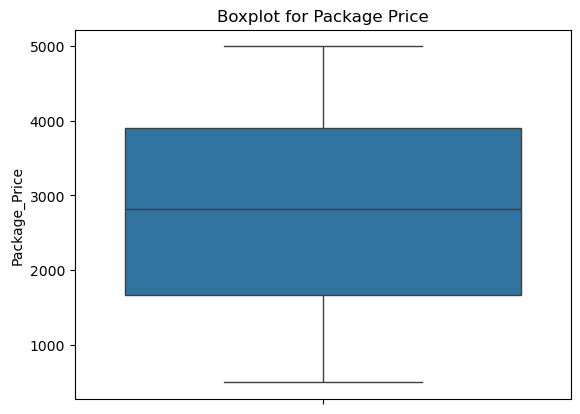

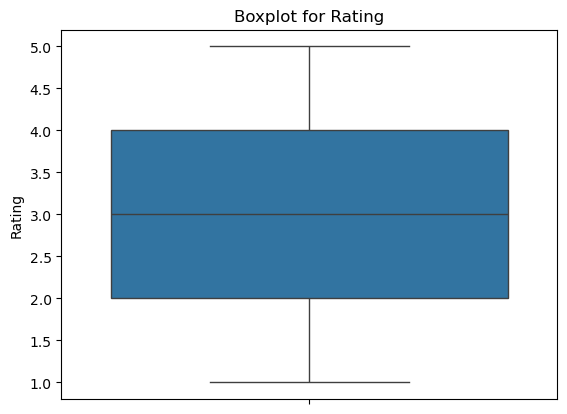

KeyError: 'Tour_Package'

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('/Users/kruthikasaisree/Downloads/Day_18_Tours_and_Travels.csv')

# Check column names to ensure 'Tour_Package' exists
print(df.columns)

# Clean column names to remove any leading/trailing spaces
df.columns = df.columns.str.strip()

# Handle Missing Values
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
print(missing_percentage)

numerical_cols = ['Customer_Age', 'Rating']
imputer_num = SimpleImputer(strategy='median')
df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])

df['Review_Text'] = df['Review_Text'].fillna('No review provided')

df = df.drop_duplicates()

df['Rating'] = df['Rating'].apply(lambda x: max(1, min(5, x)))

# Correct spelling inconsistencies in Tour_Package names
tour_package_corrections = {
    'Beach Holiday': 'Beach Holiday',
    'Mountain Trip': 'Mountain Trip',
    'City Tour': 'City Tour'
}

# Check if 'Tour_Package' exists and apply corrections
if 'Tour_Package' in df.columns:
    df['Tour_Package'] = df['Tour_Package'].replace(tour_package_corrections)
else:
    print("Column 'Tour_Package' not found. Please check the column name.")

sns.boxplot(data=df['Package_Price'])
plt.title('Boxplot for Package Price')
plt.show()

sns.boxplot(data=df['Rating'])
plt.title('Boxplot for Rating')
plt.show()

for col in ['Package_Price', 'Rating']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

label_encoder = LabelEncoder()
df['Tour_Package'] = label_encoder.fit_transform(df['Tour_Package'])

df.to_csv('cleaned_travel_reviews.csv', index=False)

print(df.info())
